In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
pip install ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.6/780.6 kB 17.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [ ]:
import time
import psutil
import torch
import matplotlib.pyplot as plt
from ultralytics import YOLO
from sklearn.metrics import precision_score, recall_score, f1_score
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
import os
%matplotlib inline
import matplotlib.pyplot as plt

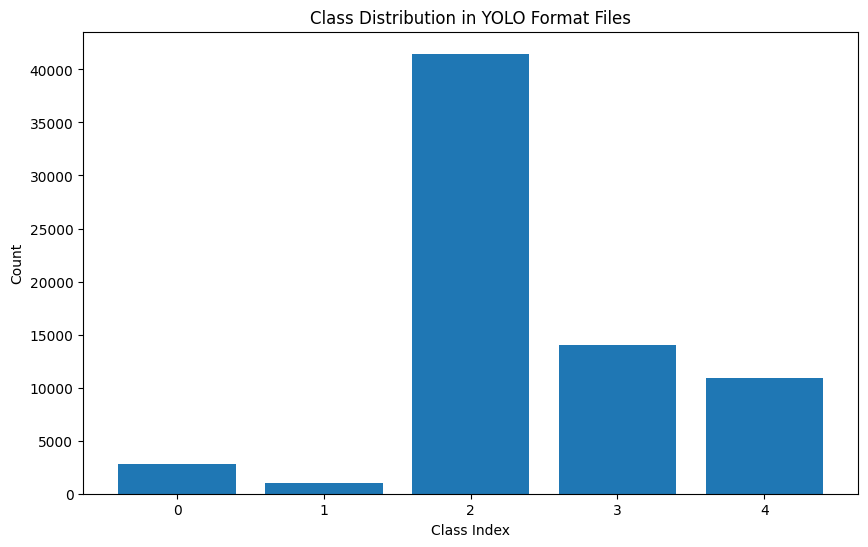

In [ ]:
train_annotation = '/content/drive/MyDrive/Colab Notebooks/archive (39)/train/labels'

class_counts = {}

for label_file in os.listdir(train_annotation):
    if label_file.endswith('.txt'):
        with open(os.path.join(train_annotation, label_file), 'r') as file:
            for line in file:
                class_index = int(line.split()[0])
                if class_index in class_counts:
                    class_counts[class_index] += 1
                else:
                    class_counts[class_index] = 1

classes = list(class_counts.keys())
counts = list(class_counts.values())

plt.figure(figsize=(10, 6))
plt.bar(classes, counts, tick_label=classes)
plt.xlabel('Class Index')
plt.ylabel('Count')
plt.title('Class Distribution in YOLO Format Files')
plt.show()


# yolov8 batch=8,lr=0.05

In [ ]:
import time
import torch
from ultralytics import YOLO
import matplotlib.pyplot as plt

data_path = '/content/drive/MyDrive/Colab Notebooks/archive (39)/data.yaml'

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model_3 = YOLO('yolov8n.pt').to(device)

start_time = time.time()

train_metrics_list_3 = []
val_metrics_list_3 = []

num_epochs = 5

for epoch in range(1, num_epochs + 1):
    results_3 = model_3.train(data=data_path, epochs=1, batch=8,lr0=0.05, device=device)
    train_metrics_list_3.append(results_3.results_dict)
    print('number of epoch:',epoch)

    val_results_3 = model_3.val()
    val_metrics_list_3.append(val_results_3.results_dict)

end_time = time.time()

training_time = end_time - start_time

print(f"Training Time: {training_time} seconds")


print(f"Memory Allocated: {torch.cuda.memory_allocated(device) / 1024 ** 3} GB")
print(f"Memory Reserved: {torch.cuda.memory_reserved(device) / 1024 ** 3} GB")




100%|██████████| 6.23M/6.23M [00:00<00:00, 359MB/s]


engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Colab Notebooks/archive (39)/data.yaml, epochs=1, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras

100%|██████████| 755k/755k [00:00<00:00, 85.4MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/Colab Notebooks/archive (39)/train/labels.cache... 5805 images, 93 backgrounds, 0 corrupt: 100%|██████████| 5805/5805 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/Colab Notebooks/archive (39)/valid/labels.cache... 549 images, 8 backgrounds, 0 corrupt: 100%|██████████| 549/549 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.05' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/726 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
        1/1      1.31G      1.412      1.577      1.107         60        640: 100%|██████████| 726/726 [09:00<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:23<00:00,  1.48it/s]


                   all        549       6270      0.746      0.604      0.677      0.423

1 epochs completed in 0.159 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:12<00:00,  2.79it/s]


                   all        549       6270      0.747      0.602      0.677      0.421
               bicycle        189        250      0.845      0.456      0.639       0.42
                   bus         81        108      0.815      0.573      0.694      0.505
                   car        520       3842      0.805      0.876      0.904      0.618
             motorbike        331       1238      0.739      0.603      0.661      0.354
                person        196        832      0.533      0.501      0.485       0.21
Speed: 0.2ms preprocess, 0.8ms inference, 0.0ms loss, 3.9ms postprocess per image
Results saved to runs/detect/train
number of epoch: 1
Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/Colab Notebooks/archive (39)/valid/labels.cache... 549 images, 8 backgrounds, 0 corrupt: 100%|██████████| 549/549 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/69 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [0

                   all        549       6270      0.747      0.603      0.676      0.423
               bicycle        189        250      0.842      0.456      0.639      0.421
                   bus         81        108      0.816      0.574      0.695       0.51
                   car        520       3842      0.804      0.876      0.904      0.619
             motorbike        331       1238      0.738      0.603      0.662      0.354
                person        196        832      0.537      0.507      0.483      0.212
Speed: 0.2ms preprocess, 2.2ms inference, 0.0ms loss, 6.2ms postprocess per image
Results saved to runs/detect/train2
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Colab Notebooks/archive (39)/data.yaml, epochs=1, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, dete

train: Scanning /content/drive/MyDrive/Colab Notebooks/archive (39)/train/labels.cache... 5805 images, 93 backgrounds, 0 corrupt: 100%|██████████| 5805/5805 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/Colab Notebooks/archive (39)/valid/labels.cache... 549 images, 8 backgrounds, 0 corrupt: 100%|██████████| 549/549 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.05' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train3
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.33G      1.626      1.393      1.255         60        640: 100%|██████████| 726/726 [01:07<00:00, 10.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:12<00:00,  2.75it/s]


                   all        549       6270      0.719       0.64      0.688      0.436

1 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 6.2MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:12<00:00,  2.85it/s]


                   all        549       6270      0.719      0.639      0.688      0.436
               bicycle        189        250      0.836      0.511      0.675      0.452
                   bus         81        108      0.759      0.702      0.742      0.547
                   car        520       3842      0.818       0.86      0.899      0.626
             motorbike        331       1238      0.702      0.607       0.66      0.354
                person        196        832       0.48      0.513      0.464      0.201
Speed: 0.2ms preprocess, 0.8ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/train3
number of epoch: 2
Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/Colab Notebooks/archive (39)/valid/labels.cache... 549 images, 8 backgrounds, 0 corrupt: 100%|██████████| 549/549 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:08<00:00,  8.37it/s]


                   all        549       6270       0.72      0.641      0.689      0.436
               bicycle        189        250      0.837      0.512      0.677      0.451
                   bus         81        108       0.76      0.703      0.743      0.546
                   car        520       3842      0.819       0.86        0.9      0.627
             motorbike        331       1238      0.703      0.609      0.658      0.354
                person        196        832      0.481      0.519      0.464      0.203
Speed: 0.2ms preprocess, 2.9ms inference, 0.0ms loss, 4.8ms postprocess per image
Results saved to runs/detect/train32
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Colab Notebooks/archive (39)/data.yaml, epochs=1, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train33, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, de

train: Scanning /content/drive/MyDrive/Colab Notebooks/archive (39)/train/labels.cache... 5805 images, 93 backgrounds, 0 corrupt: 100%|██████████| 5805/5805 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/Colab Notebooks/archive (39)/valid/labels.cache... 549 images, 8 backgrounds, 0 corrupt: 100%|██████████| 549/549 [00:00<?, ?it/s]


Plotting labels to runs/detect/train33/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.05' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train33
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.35G      1.298      1.021      1.066         60        640: 100%|██████████| 726/726 [01:08<00:00, 10.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:12<00:00,  2.70it/s]


                   all        549       6270      0.763      0.661      0.714      0.462

1 epochs completed in 0.064 hours.
Optimizer stripped from runs/detect/train33/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train33/weights/best.pt, 6.2MB

Validating runs/detect/train33/weights/best.pt...
Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:12<00:00,  2.82it/s]


                   all        549       6270      0.762      0.661      0.714      0.462
               bicycle        189        250      0.869       0.53      0.696      0.473
                   bus         81        108       0.85      0.704      0.765      0.597
                   car        520       3842      0.847      0.859      0.912      0.642
             motorbike        331       1238      0.731       0.66      0.702      0.378
                person        196        832      0.514      0.551      0.494      0.219
Speed: 0.2ms preprocess, 0.8ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train33
number of epoch: 3
Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/Colab Notebooks/archive (39)/valid/labels.cache... 549 images, 8 backgrounds, 0 corrupt: 100%|██████████| 549/549 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:08<00:00,  8.44it/s]


                   all        549       6270      0.764      0.662      0.715      0.462
               bicycle        189        250      0.869       0.53      0.695      0.473
                   bus         81        108      0.851      0.704      0.765      0.596
                   car        520       3842      0.847      0.859      0.912      0.641
             motorbike        331       1238      0.734       0.66      0.704      0.379
                person        196        832      0.517      0.555      0.498      0.219
Speed: 0.3ms preprocess, 6.0ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/train332
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Colab Notebooks/archive (39)/data.yaml, epochs=1, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train333, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, 

train: Scanning /content/drive/MyDrive/Colab Notebooks/archive (39)/train/labels.cache... 5805 images, 93 backgrounds, 0 corrupt: 100%|██████████| 5805/5805 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/Colab Notebooks/archive (39)/valid/labels.cache... 549 images, 8 backgrounds, 0 corrupt: 100%|██████████| 549/549 [00:00<?, ?it/s]


Plotting labels to runs/detect/train333/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.05' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train333
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.33G      1.224     0.9226      1.032         60        640: 100%|██████████| 726/726 [01:07<00:00, 10.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:12<00:00,  2.72it/s]


                   all        549       6270      0.746      0.683      0.737      0.475

1 epochs completed in 0.063 hours.
Optimizer stripped from runs/detect/train333/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train333/weights/best.pt, 6.2MB

Validating runs/detect/train333/weights/best.pt...
Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:12<00:00,  2.83it/s]


                   all        549       6270      0.745      0.683      0.737      0.476
               bicycle        189        250      0.869      0.588      0.733      0.499
                   bus         81        108      0.751      0.727      0.786      0.608
                   car        520       3842      0.839      0.871      0.913      0.647
             motorbike        331       1238      0.704      0.691      0.717      0.389
                person        196        832      0.564       0.54      0.535      0.237
Speed: 0.2ms preprocess, 0.8ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train333
number of epoch: 4
Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/Colab Notebooks/archive (39)/valid/labels.cache... 549 images, 8 backgrounds, 0 corrupt: 100%|██████████| 549/549 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:08<00:00,  8.44it/s]


                   all        549       6270      0.746      0.683      0.737      0.477
               bicycle        189        250      0.868      0.588      0.733        0.5
                   bus         81        108      0.751      0.726      0.786      0.613
                   car        520       3842      0.839       0.87      0.912      0.646
             motorbike        331       1238      0.705      0.691      0.718      0.388
                person        196        832      0.567      0.538      0.538      0.238
Speed: 0.2ms preprocess, 3.6ms inference, 0.0ms loss, 4.3ms postprocess per image
Results saved to runs/detect/train3332
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Colab Notebooks/archive (39)/data.yaml, epochs=1, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train3333, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0

train: Scanning /content/drive/MyDrive/Colab Notebooks/archive (39)/train/labels.cache... 5805 images, 93 backgrounds, 0 corrupt: 100%|██████████| 5805/5805 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/Colab Notebooks/archive (39)/valid/labels.cache... 549 images, 8 backgrounds, 0 corrupt: 100%|██████████| 549/549 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3333/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.05' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train3333
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.33G      1.172     0.8573      1.011         60        640: 100%|██████████| 726/726 [01:07<00:00, 10.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:12<00:00,  2.75it/s]


                   all        549       6270      0.761      0.681      0.741      0.487

1 epochs completed in 0.063 hours.
Optimizer stripped from runs/detect/train3333/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train3333/weights/best.pt, 6.2MB

Validating runs/detect/train3333/weights/best.pt...
Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:12<00:00,  2.90it/s]


                   all        549       6270       0.76      0.681      0.741      0.486
               bicycle        189        250      0.806      0.608      0.738      0.508
                   bus         81        108      0.798      0.713      0.785      0.628
                   car        520       3842      0.843       0.88      0.916      0.657
             motorbike        331       1238      0.737      0.695      0.725      0.397
                person        196        832      0.615      0.511      0.542      0.243
Speed: 0.2ms preprocess, 0.8ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train3333
number of epoch: 5
Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/Colab Notebooks/archive (39)/valid/labels.cache... 549 images, 8 backgrounds, 0 corrupt: 100%|██████████| 549/549 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:07<00:00,  8.70it/s]


                   all        549       6270       0.76      0.682      0.742      0.486
               bicycle        189        250      0.805      0.608      0.734      0.508
                   bus         81        108      0.798      0.713      0.786      0.626
                   car        520       3842      0.844       0.88      0.916      0.657
             motorbike        331       1238      0.735      0.695      0.727      0.396
                person        196        832      0.619      0.513      0.548      0.244
Speed: 0.3ms preprocess, 5.2ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/train33332
Training Time: 1716.22607254982 seconds
Memory Allocated: 0.13027524948120117 GB
Memory Reserved: 0.66796875 GB


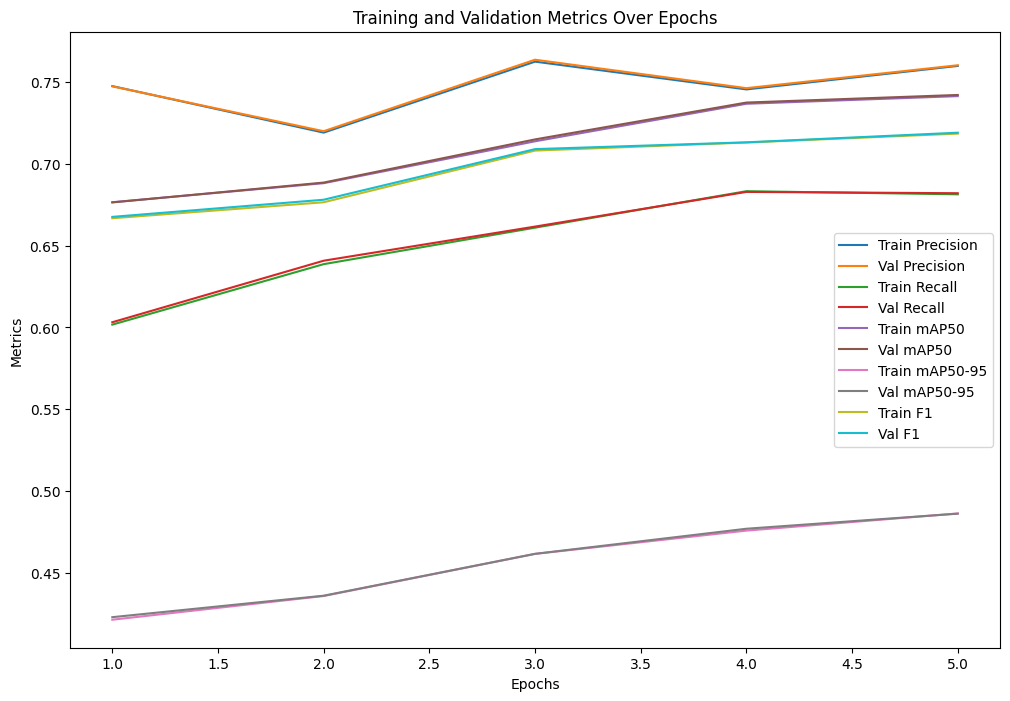

In [ ]:

epochs = list(range(1, num_epochs + 1))

# Initialize lists for metrics
train_precision_3 = []
train_recall_3 = []
train_map50_3 = []
train_map50_95_3 = []
train_f1_3 = []

val_precision_3 = []
val_recall_3 = []
val_map50_3 = []
val_map50_95_3 = []
val_f1_3 = []


for train_metrics, val_metrics in zip(train_metrics_list_3, val_metrics_list_3):
    train_precision_3.append(train_metrics['metrics/precision(B)'])
    train_recall_3.append(train_metrics['metrics/recall(B)'])
    train_map50_3.append(train_metrics['metrics/mAP50(B)'])
    train_map50_95_3.append(train_metrics['metrics/mAP50-95(B)'])
    train_f1_3.append(2 * (train_precision_3[-1] * train_recall_3[-1]) / (train_precision_3[-1] + train_recall_3[-1]))

    val_precision_3.append(val_metrics['metrics/precision(B)'])
    val_recall_3.append(val_metrics['metrics/recall(B)'])
    val_map50_3.append(val_metrics['metrics/mAP50(B)'])
    val_map50_95_3.append(val_metrics['metrics/mAP50-95(B)'])
    val_f1_3.append(2 * (val_precision_3[-1] * val_recall_3[-1]) / (val_precision_3[-1] + val_recall_3[-1]))


plt.figure(figsize=(12, 8))
plt.plot(epochs, train_precision_3, label='Train Precision')
plt.plot(epochs, val_precision_3, label='Val Precision')
plt.plot(epochs, train_recall_3, label='Train Recall')
plt.plot(epochs, val_recall_3, label='Val Recall')
plt.plot(epochs, train_map50_3, label='Train mAP50')
plt.plot(epochs, val_map50_3, label='Val mAP50')
plt.plot(epochs, train_map50_95_3, label='Train mAP50-95')
plt.plot(epochs, val_map50_95_3, label='Val mAP50-95')
plt.plot(epochs, train_f1_3, label='Train F1')
plt.plot(epochs, val_f1_3, label='Val F1')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.title('Training and Validation Metrics Over Epochs')
plt.legend()
plt.show()

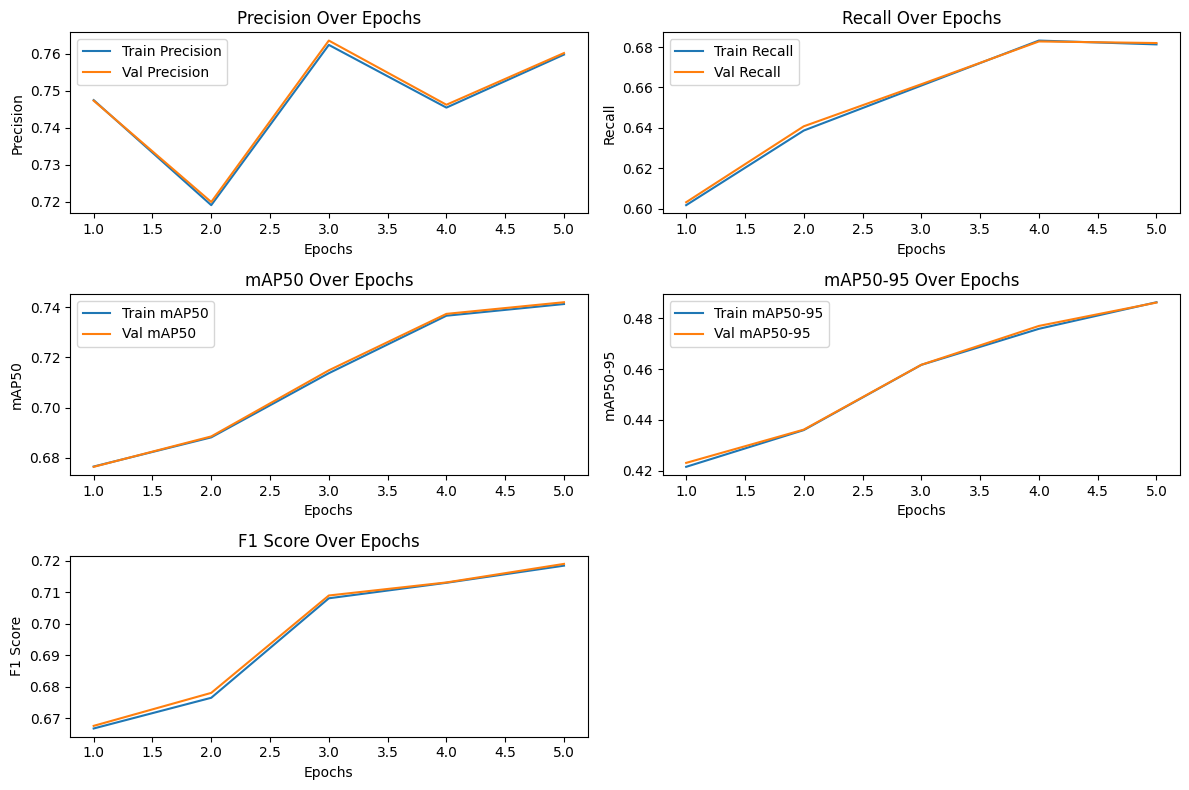

In [ ]:

plt.figure(figsize=(12, 8))

plt.subplot(3, 2, 1)
plt.plot(epochs, train_precision_3, label='Train Precision')
plt.plot(epochs, val_precision_3, label='Val Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.title('Precision Over Epochs')
plt.legend()

plt.subplot(3, 2, 2)
plt.plot(epochs, train_recall_3, label='Train Recall')
plt.plot(epochs, val_recall_3, label='Val Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.title('Recall Over Epochs')
plt.legend()

plt.subplot(3, 2, 3)
plt.plot(epochs, train_map50_3, label='Train mAP50')
plt.plot(epochs, val_map50_3, label='Val mAP50')
plt.xlabel('Epochs')
plt.ylabel('mAP50')
plt.title('mAP50 Over Epochs')
plt.legend()

plt.subplot(3, 2, 4)
plt.plot(epochs, train_map50_95_3, label='Train mAP50-95')
plt.plot(epochs, val_map50_95_3, label='Val mAP50-95')
plt.xlabel('Epochs')
plt.ylabel('mAP50-95')
plt.title('mAP50-95 Over Epochs')
plt.legend()

plt.subplot(3, 2, 5)
plt.plot(epochs, train_f1_3, label='Train F1 Score')
plt.plot(epochs, val_f1_3, label='Val F1 Score')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.title('F1 Score Over Epochs')

plt.tight_layout()
plt.show()


In [ ]:
test_results_3 = model_3.val(data=data_path,split='test')


Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)


val: Scanning /content/drive/MyDrive/Colab Notebooks/archive (39)/test/labels.cache... 279 images, 9 backgrounds, 0 corrupt: 100%|██████████| 279/279 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  94%|█████████▍| 33/35 [00:35<00:02,  1.14s/it]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 

                   all        279       3188      0.787      0.694      0.765      0.496
               bicycle         98        134      0.846      0.573      0.752      0.505
                   bus         36         41      0.874       0.78      0.839      0.657
                   car        259       1911      0.838      0.861      0.897      0.638
             motorbike        164        650      0.746      0.711      0.736      0.402
                person         97        452      0.631      0.548      0.602      0.277
Speed: 0.2ms preprocess, 1.8ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train33333


In [ ]:
test_metrics_3=test_results_3.results_dict

In [ ]:
test_F1_3=2 * (test_metrics_3['metrics/precision(B)'] * test_metrics_3['metrics/recall(B)']) / (test_metrics_3['metrics/precision(B)'] + test_metrics_3['metrics/recall(B)'])

In [ ]:
print(test_F1_3)

0.7378008323532178


In [ ]:
# Save the model
torch.save(model_3.state_dict(), 'yolov8_model_8_0.05_state_dict.pt')

# yolov8 batch=16,lr=0.001

In [ ]:
import time
import torch
from ultralytics import YOLO
import matplotlib.pyplot as plt

data_path = '/content/drive/MyDrive/Colab Notebooks/archive (39)/data.yaml'

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model_4 = YOLO('yolov8n.pt').to(device)

start_time = time.time()


train_metrics_list_4 = []
val_metrics_list_4 = []


num_epochs = 5

for epoch in range(1, num_epochs + 1):
    # Train for one epoch
    results_4 = model_4.train(data=data_path, epochs=1, batch=16,lr0=0.001, device=device)
    print('number of epoch:',epoch)
    train_metrics_list_4.append(results_4.results_dict)


    val_results_4 = model_4.val()
    val_metrics_list_4.append(val_results_4.results_dict)

end_time = time.time()


training_time = end_time - start_time


print(f"Training Time: {training_time} seconds")

# Memory usage
print(f"Memory Allocated: {torch.cuda.memory_allocated(device) / 1024 ** 3} GB")
print(f"Memory Reserved: {torch.cuda.memory_reserved(device) / 1024 ** 3} GB")




engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Colab Notebooks/archive (39)/data.yaml, epochs=1, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, ker

train: Scanning /content/drive/MyDrive/Colab Notebooks/archive (39)/train/labels.cache... 5805 images, 93 backgrounds, 0 corrupt: 100%|██████████| 5805/5805 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/Colab Notebooks/archive (39)/valid/labels.cache... 549 images, 8 backgrounds, 0 corrupt: 100%|██████████| 549/549 [00:00<?, ?it/s]


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train4
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/363 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
        1/1      2.88G      1.427      1.665      1.105        194        640: 100%|██████████| 363/363 [00:48<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:12<00:00,  1.40it/s]


                   all        549       6270      0.689      0.652      0.681      0.427

1 epochs completed in 0.019 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 6.2MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  17%|█▋        | 3/18 [00:03<00:15,  1.05s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:12<00:00,  1.48it/s]


                   all        549       6270      0.684      0.639      0.664      0.414
               bicycle        189        250      0.856       0.48       0.58      0.388
                   bus         81        108      0.479      0.806      0.714      0.513
                   car        520       3842      0.736      0.888      0.893      0.607
             motorbike        331       1238      0.709      0.604      0.637      0.353
                person        196        832      0.637      0.417      0.498       0.21
Speed: 0.2ms preprocess, 1.0ms inference, 0.0ms loss, 8.8ms postprocess per image
Results saved to runs/detect/train4
number of epoch: 1
Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/Colab Notebooks/archive (39)/valid/labels.cache... 549 images, 8 backgrounds, 0 corrupt: 100%|██████████| 549/549 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/35 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [0

                   all        549       6270      0.693       0.65       0.68      0.427
               bicycle        189        250      0.864      0.534      0.638      0.438
                   bus         81        108      0.485      0.806      0.713      0.511
                   car        520       3842      0.743      0.893        0.9      0.614
             motorbike        331       1238      0.722      0.612      0.649      0.361
                person        196        832      0.651      0.407      0.501      0.212
Speed: 0.2ms preprocess, 2.9ms inference, 0.0ms loss, 10.0ms postprocess per image
Results saved to runs/detect/train42
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Colab Notebooks/archive (39)/data.yaml, epochs=1, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train43, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, 

train: Scanning /content/drive/MyDrive/Colab Notebooks/archive (39)/train/labels.cache... 5805 images, 93 backgrounds, 0 corrupt: 100%|██████████| 5805/5805 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/Colab Notebooks/archive (39)/valid/labels.cache... 549 images, 8 backgrounds, 0 corrupt: 100%|██████████| 549/549 [00:00<?, ?it/s]


Plotting labels to runs/detect/train43/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train43
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      2.95G      1.682      1.449      1.282        194        640: 100%|██████████| 363/363 [00:49<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:12<00:00,  1.45it/s]


                   all        549       6270      0.697      0.616      0.669      0.423

1 epochs completed in 0.031 hours.
Optimizer stripped from runs/detect/train43/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train43/weights/best.pt, 6.2MB

Validating runs/detect/train43/weights/best.pt...
Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  17%|█▋        | 3/18 [00:03<00:15,  1.04s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:11<00:00,  1.53it/s]


                   all        549       6270      0.696      0.607       0.66      0.416
               bicycle        189        250      0.802      0.468      0.603      0.412
                   bus         81        108      0.707      0.604      0.699      0.524
                   car        520       3842      0.715      0.896      0.894       0.61
             motorbike        331       1238      0.739      0.587      0.643      0.339
                person        196        832      0.517      0.482      0.461      0.194
Speed: 0.2ms preprocess, 1.0ms inference, 0.0ms loss, 8.3ms postprocess per image
Results saved to runs/detect/train43
number of epoch: 2
Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/Colab Notebooks/archive (39)/valid/labels.cache... 549 images, 8 backgrounds, 0 corrupt: 100%|██████████| 549/549 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:14<00:00,  2.48it/s]


                   all        549       6270      0.699      0.616       0.67      0.423
               bicycle        189        250      0.807        0.5      0.635      0.437
                   bus         81        108      0.708      0.602        0.7      0.524
                   car        520       3842      0.717        0.9      0.899      0.614
             motorbike        331       1238      0.748      0.598      0.656      0.345
                person        196        832      0.517      0.481      0.462      0.194
Speed: 0.4ms preprocess, 7.0ms inference, 0.0ms loss, 7.1ms postprocess per image
Results saved to runs/detect/train432
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Colab Notebooks/archive (39)/data.yaml, epochs=1, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train433, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0,

train: Scanning /content/drive/MyDrive/Colab Notebooks/archive (39)/train/labels.cache... 5805 images, 93 backgrounds, 0 corrupt: 100%|██████████| 5805/5805 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/Colab Notebooks/archive (39)/valid/labels.cache... 549 images, 8 backgrounds, 0 corrupt: 100%|██████████| 549/549 [00:00<?, ?it/s]


Plotting labels to runs/detect/train433/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train433
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      2.97G      1.312      1.038      1.067        194        640: 100%|██████████| 363/363 [00:52<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:12<00:00,  1.45it/s]


                   all        549       6270      0.737      0.656      0.718      0.453

1 epochs completed in 0.059 hours.
Optimizer stripped from runs/detect/train433/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train433/weights/best.pt, 6.2MB

Validating runs/detect/train433/weights/best.pt...
Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  17%|█▋        | 3/18 [00:03<00:15,  1.02s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:11<00:00,  1.52it/s]


                   all        549       6270      0.734      0.645      0.703      0.442
               bicycle        189        250       0.83      0.506      0.645      0.421
                   bus         81        108      0.768      0.685      0.764      0.578
                   car        520       3842      0.744      0.894        0.9      0.611
             motorbike        331       1238      0.738       0.65      0.693      0.373
                person        196        832      0.592      0.489      0.515      0.224
Speed: 0.2ms preprocess, 1.0ms inference, 0.0ms loss, 8.2ms postprocess per image
Results saved to runs/detect/train433
number of epoch: 3
Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/Colab Notebooks/archive (39)/valid/labels.cache... 549 images, 8 backgrounds, 0 corrupt: 100%|██████████| 549/549 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:13<00:00,  2.55it/s]


                   all        549       6270      0.738      0.656      0.717      0.454
               bicycle        189        250      0.837      0.555      0.695      0.466
                   bus         81        108       0.77      0.685      0.764      0.579
                   car        520       3842      0.748        0.9      0.907      0.617
             motorbike        331       1238      0.742      0.658      0.707      0.381
                person        196        832      0.593       0.48      0.514      0.224
Speed: 0.6ms preprocess, 7.9ms inference, 0.0ms loss, 3.7ms postprocess per image
Results saved to runs/detect/train4332
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Colab Notebooks/archive (39)/data.yaml, epochs=1, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train4333, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=

train: Scanning /content/drive/MyDrive/Colab Notebooks/archive (39)/train/labels.cache... 5805 images, 93 backgrounds, 0 corrupt: 100%|██████████| 5805/5805 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/Colab Notebooks/archive (39)/valid/labels.cache... 549 images, 8 backgrounds, 0 corrupt: 100%|██████████| 549/549 [00:00<?, ?it/s]


Plotting labels to runs/detect/train4333/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train4333
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      2.98G      1.235     0.9389      1.031        194        640: 100%|██████████| 363/363 [00:49<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:12<00:00,  1.47it/s]


                   all        549       6270       0.74      0.688      0.739      0.472

1 epochs completed in 0.058 hours.
Optimizer stripped from runs/detect/train4333/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train4333/weights/best.pt, 6.2MB

Validating runs/detect/train4333/weights/best.pt...
Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:11<00:00,  1.52it/s]


                   all        549       6270      0.741      0.688      0.739      0.472
               bicycle        189        250      0.836      0.612      0.733      0.496
                   bus         81        108      0.712      0.787      0.805       0.63
                   car        520       3842      0.789      0.899      0.916      0.618
             motorbike        331       1238      0.762      0.674      0.723      0.386
                person        196        832      0.603      0.466       0.52      0.232
Speed: 0.5ms preprocess, 5.6ms inference, 0.0ms loss, 8.4ms postprocess per image
Results saved to runs/detect/train4333
number of epoch: 4
Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/Colab Notebooks/archive (39)/valid/labels.cache... 549 images, 8 backgrounds, 0 corrupt: 100%|██████████| 549/549 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   6%|▌         | 2/35 [00:00<00:12,  2.70it/s]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:13<00:00,  2.65it/s]


                   all        549       6270      0.741      0.682      0.734      0.469
               bicycle        189        250      0.835      0.607      0.728      0.495
                   bus         81        108      0.712      0.787      0.805       0.63
                   car        520       3842      0.789      0.884        0.9      0.609
             motorbike        331       1238      0.768       0.67      0.718      0.382
                person        196        832      0.603      0.464      0.518      0.232
Speed: 0.2ms preprocess, 1.6ms inference, 0.0ms loss, 7.4ms postprocess per image
Results saved to runs/detect/train43332
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Colab Notebooks/archive (39)/data.yaml, epochs=1, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train43333, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, see

train: Scanning /content/drive/MyDrive/Colab Notebooks/archive (39)/train/labels.cache... 5805 images, 93 backgrounds, 0 corrupt: 100%|██████████| 5805/5805 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/Colab Notebooks/archive (39)/valid/labels.cache... 549 images, 8 backgrounds, 0 corrupt: 100%|██████████| 549/549 [00:00<?, ?it/s]


Plotting labels to runs/detect/train43333/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train43333
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      2.98G      1.183      0.874      1.009        194        640: 100%|██████████| 363/363 [03:21<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:12<00:00,  1.47it/s]


                   all        549       6270      0.772      0.683      0.748      0.477

1 epochs completed in 0.063 hours.
Optimizer stripped from runs/detect/train43333/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train43333/weights/best.pt, 6.2MB

Validating runs/detect/train43333/weights/best.pt...
Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  17%|█▋        | 3/18 [00:03<00:17,  1.17s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:12<00:00,  1.46it/s]


                   all        549       6270      0.771       0.68      0.744      0.473
               bicycle        189        250      0.797      0.644      0.723      0.491
                   bus         81        108      0.835      0.704      0.789      0.615
                   car        520       3842      0.812      0.886      0.913       0.62
             motorbike        331       1238      0.804      0.654      0.734      0.394
                person        196        832      0.608      0.511      0.559      0.246
Speed: 0.2ms preprocess, 1.0ms inference, 0.0ms loss, 8.0ms postprocess per image
Results saved to runs/detect/train43333
number of epoch: 5
Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/Colab Notebooks/archive (39)/valid/labels.cache... 549 images, 8 backgrounds, 0 corrupt: 100%|██████████| 549/549 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:13<00:00,  2.54it/s]


                   all        549       6270      0.776      0.681      0.747      0.477
               bicycle        189        250      0.802      0.656      0.738      0.505
                   bus         81        108      0.834      0.699       0.79      0.614
                   car        520       3842      0.815      0.887      0.914      0.622
             motorbike        331       1238      0.812      0.657      0.738      0.395
                person        196        832      0.616      0.506      0.558      0.246
Speed: 0.2ms preprocess, 1.6ms inference, 0.0ms loss, 8.5ms postprocess per image
Results saved to runs/detect/train433332
Training Time: 1165.8992538452148 seconds
Memory Allocated: 0.22435760498046875 GB
Memory Reserved: 1.181640625 GB


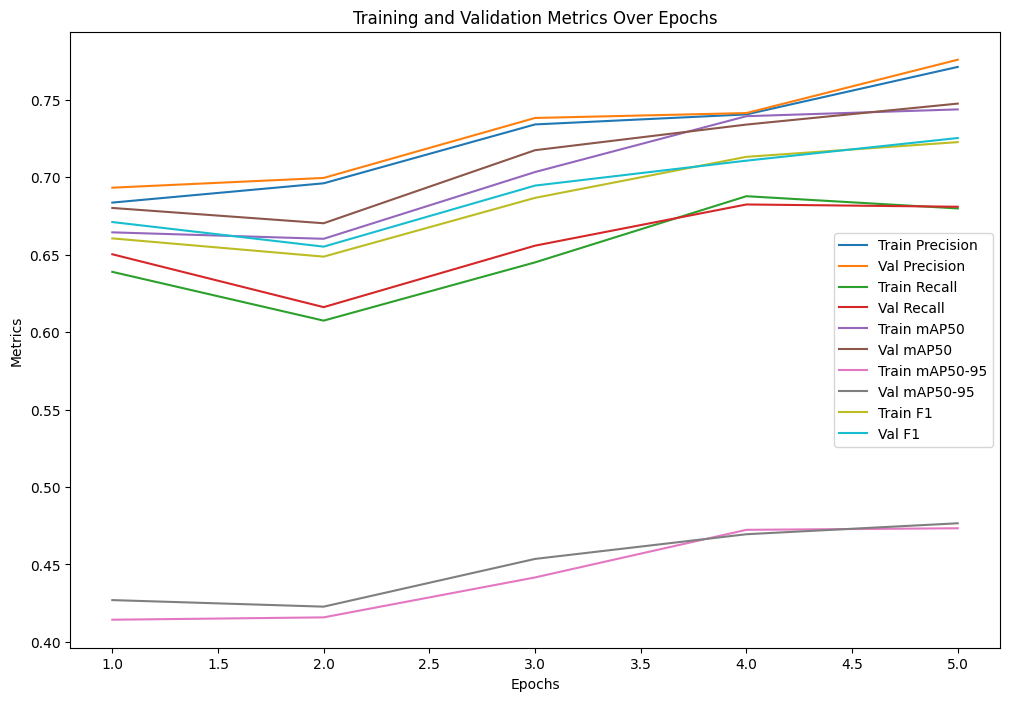

In [ ]:
epochs = list(range(1, num_epochs + 1))

train_precision_4 = []
train_recall_4 = []
train_map50_4 = []
train_map50_95_4 = []
train_f1_4 = []

val_precision_4 = []
val_recall_4 = []
val_map50_4 = []
val_map50_95_4 = []
val_f1_4 = []

for train_metrics, val_metrics in zip(train_metrics_list_4, val_metrics_list_4):
    train_precision_4.append(train_metrics['metrics/precision(B)'])
    train_recall_4.append(train_metrics['metrics/recall(B)'])
    train_map50_4.append(train_metrics['metrics/mAP50(B)'])
    train_map50_95_4.append(train_metrics['metrics/mAP50-95(B)'])
    train_f1_4.append(2 * (train_precision_4[-1] * train_recall_4[-1]) / (train_precision_4[-1] + train_recall_4[-1]))

    val_precision_4.append(val_metrics['metrics/precision(B)'])
    val_recall_4.append(val_metrics['metrics/recall(B)'])
    val_map50_4.append(val_metrics['metrics/mAP50(B)'])
    val_map50_95_4.append(val_metrics['metrics/mAP50-95(B)'])
    val_f1_4.append(2 * (val_precision_4[-1] * val_recall_4[-1]) / (val_precision_4[-1] + val_recall_4[-1]))

# Plotting the metrics
plt.figure(figsize=(12, 8))
plt.plot(epochs, train_precision_4, label='Train Precision')
plt.plot(epochs, val_precision_4, label='Val Precision')
plt.plot(epochs, train_recall_4, label='Train Recall')
plt.plot(epochs, val_recall_4, label='Val Recall')
plt.plot(epochs, train_map50_4, label='Train mAP50')
plt.plot(epochs, val_map50_4, label='Val mAP50')
plt.plot(epochs, train_map50_95_4, label='Train mAP50-95')
plt.plot(epochs, val_map50_95_4, label='Val mAP50-95')
plt.plot(epochs, train_f1_4, label='Train F1')
plt.plot(epochs, val_f1_4, label='Val F1')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.title('Training and Validation Metrics Over Epochs')
plt.legend()
plt.show()

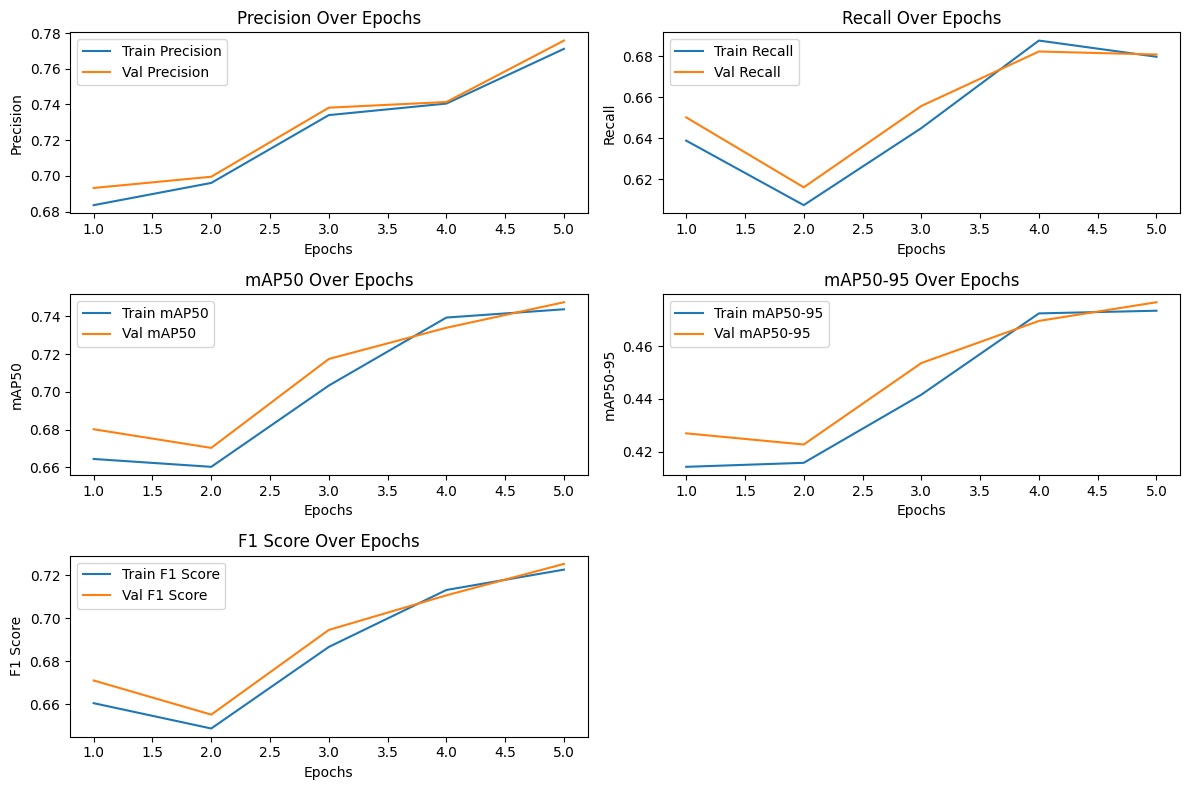

In [ ]:
# Plotting the metrics
plt.figure(figsize=(12, 8))

plt.subplot(3, 2, 1)
plt.plot(epochs, train_precision_4, label='Train Precision')
plt.plot(epochs, val_precision_4, label='Val Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.title('Precision Over Epochs')
plt.legend()

plt.subplot(3, 2, 2)
plt.plot(epochs, train_recall_4, label='Train Recall')
plt.plot(epochs, val_recall_4, label='Val Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.title('Recall Over Epochs')
plt.legend()

plt.subplot(3, 2, 3)
plt.plot(epochs, train_map50_4, label='Train mAP50')
plt.plot(epochs, val_map50_4, label='Val mAP50')
plt.xlabel('Epochs')
plt.ylabel('mAP50')
plt.title('mAP50 Over Epochs')
plt.legend()

plt.subplot(3, 2, 4)
plt.plot(epochs, train_map50_95_4, label='Train mAP50-95')
plt.plot(epochs, val_map50_95_4, label='Val mAP50-95')
plt.xlabel('Epochs')
plt.ylabel('mAP50-95')
plt.title('mAP50-95 Over Epochs')
plt.legend()

plt.subplot(3, 2, 5)
plt.plot(epochs, train_f1_4, label='Train F1 Score')
plt.plot(epochs, val_f1_4, label='Val F1 Score')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.title('F1 Score Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
test_results_4 = model_4.val(data=data_path,split='test')


Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)


val: Scanning /content/drive/MyDrive/Colab Notebooks/archive (39)/test/labels.cache... 279 images, 9 backgrounds, 0 corrupt: 100%|██████████| 279/279 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:12<00:00,  1.41it/s]


                   all        279       3188      0.765      0.726      0.775      0.491
               bicycle         98        134      0.853      0.651      0.771      0.508
                   bus         36         41      0.842       0.78      0.845      0.647
                   car        259       1911      0.783      0.886      0.905      0.612
             motorbike        164        650      0.763      0.708      0.759      0.419
                person         97        452      0.584      0.606      0.594      0.271
Speed: 0.2ms preprocess, 1.6ms inference, 0.0ms loss, 9.9ms postprocess per image
Results saved to runs/detect/train433333


In [ ]:
test_metrics_4=test_results_4.results_dict
test_metrics_4

{'metrics/precision(B)': 0.7651239845595639,
 'metrics/recall(B)': 0.7263289229021173,
 'metrics/mAP50(B)': 0.7749022360640454,
 'metrics/mAP50-95(B)': 0.4914144989921062,
 'fitness': 0.5197632726993001}

In [ ]:
test_f1_4=2 * (test_metrics_4['metrics/precision(B)'] * test_metrics_4['metrics/recall(B)']) / (test_metrics_4['metrics/precision(B)'] + test_metrics_4['metrics/recall(B)'])

In [ ]:
print(test_f1_4)

0.7452218931102955


In [ ]:
# Save the model
torch.save(model_4.state_dict(), 'yolov8_model_16_0.001_state_dict.pt')